## Implement the modified Urn model

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [67]:
def Ehrenfest_urn(length,q,N):
    left_ball_path = []
    right_ball_path = []
    
    left_ball = q*N
    right_ball = (1-q)*N
    
    left_ball_path.append(left_ball)
    right_ball_path.append(right_ball)
    
    for i in range(length):
        pick = np.random.choice([0,1],p=[left_ball/N,right_ball/N])
        if pick == 0:
            left_ball -= 1
            replace = np.random.choice([1,0],p=[right_ball/(N-1),left_ball/(N-1)])
            if replace == 0:
                left_ball+=1
            elif replace == 1:
                right_ball+=1
        elif pick == 1:
            right_ball -=1
            replace = np.random.choice([1,0],p=[right_ball/(N-1),left_ball/(N-1)])
            if replace == 0:
                left_ball+=1
            elif replace == 1:
                right_ball+=1
                                
        left_ball_path.append(left_ball)
        right_ball_path.append(right_ball)
    return left_ball_path,right_ball_path
            

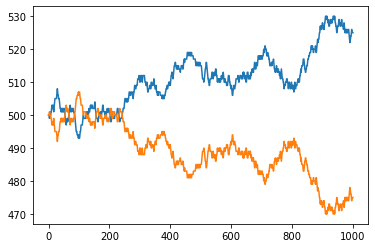

In [71]:
a,b=Ehrenfest_urn(1000,0.5,1000)
plt.plot(a)
plt.plot(b)
plt.show()

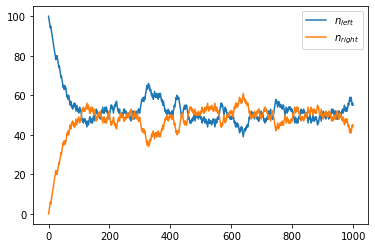

In [72]:
# alternative way
def urn_start(N, n):        
    left_ball = np.zeros(n,dtype = int)
    right_ball = np.ones(N-n,dtype = int)
    urn_start = np.concatenate((left_ball,right_ball),axis=None)   
    return urn_start
def trans(vec, x):
    return float(sum(vec==x))

def transition_prob(length):
    num_ball = len(length)    
    y = rd.randint(0,num_ball-1)
    if length[y]==1: 
        length[y]=0        
    else: 
        length[y]=1
    return length  
N  = 100
n = N

urn_ball = urn_start(N,n)

left_urn = [trans(urn_ball, 0)]
right_urn = [trans(urn_ball, 1)]

for i in range(1,1000): #simulate 1000 times 
    urn_ball = transition_prob(urn_ball)
    left_urn.append( trans(urn_ball, 0) )
    right_urn.append( trans(urn_ball, 1) )
    
plt.plot(left_urn,label='$n_{left}$')
plt.plot(right_urn,label='$n_{right}$')
plt.legend()

## adding  alpha and beta value:

In [73]:
def Modified_urn(length,q,N,alpha,beta):
    left_ball_path = []
    right_ball_path = []
    
    left_ball = q*N
    right_ball = (1-q)*N
    
    left_ball_path.append(left_ball)
    right_ball_path.append(right_ball)
    
    for i in range(length):
        pick = np.random.choice([0,1],p=[left_ball/N,right_ball/N])
        if pick == 0:
            left_ball -= 1
            replace = np.random.choice([1,0],p=[(beta+right_ball)/(alpha+beta+N-1),(alpha+left_ball)/(alpha+beta+N-1)])
            if replace == 0:
                left_ball+=1
            elif replace == 1:
                right_ball+=1
        elif pick == 1:
            right_ball -=1
            replace = np.random.choice([1,0],p=[(beta+right_ball)/(alpha+beta+N-1),(alpha+left_ball)/(alpha+beta+N-1)])
            if replace == 0:
                left_ball+=1
            elif replace == 1:
                right_ball+=1
                                
        left_ball_path.append(left_ball)
        right_ball_path.append(right_ball)
    return left_ball_path,right_ball_path

## Case 1: alpha = beta = 0.01:

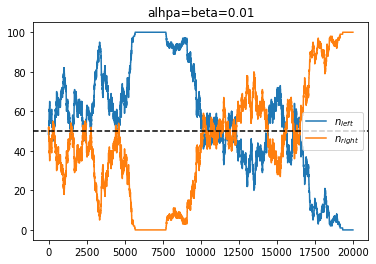

In [109]:
a,b=Modified_urn(length=20000,q=0.5,N=100,alpha=0.01,beta=0.01)
plt.plot(a,label='$n_{left}$')
plt.plot(b,label='$n_{right}$')
plt.title('alhpa=beta=0.01')
plt.axhline(y=float(50), color='k', linestyle='--')
plt.legend()

## Case 2: alpha = beta = 100:

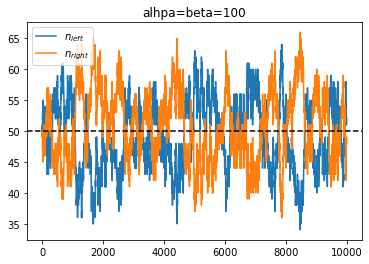

In [108]:
a,b=Modified_urn(length=10000,q=0.5,N=100,alpha=100,beta=100)
plt.plot(a,label='$n_{left}$')
plt.plot(b,label='$n_{right}$')
plt.title('alhpa=beta=100')
plt.axhline(y=float(50), color='k', linestyle='--')
plt.legend()

# Case 3: alpha = beta = -100:

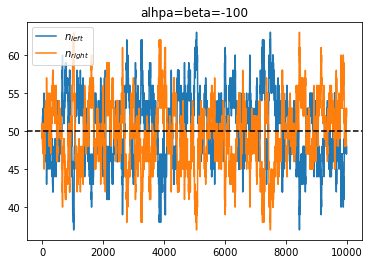

In [137]:
a,b=Modified_urn(length=10000,q=0.5,N=100,alpha=-100,beta=-100)
plt.plot(a,label='$n_{left}$')
plt.plot(b,label='$n_{right}$')
plt.title('alhpa=beta=-100')
plt.axhline(y=float(50), color='k', linestyle='--')
plt.legend()

## Three traders: Bear, Bull, Neutrall

In [154]:
def urn_trader(N,bull_num,bear_num,alpha,beta,step): 
    bull_urn = []
    bear_urn = [] 
    neutral_urn = []
    price_change = [] 
    
    for i in range(step):
        pick = np.random.choice([1,-1,0], p = [bull_num/N, bear_num/N, (N - bull_num - bear_num)/N])
        
        if pick == 1:
            replace = np.random.choice([1,-1,0], p = [(alpha+bull_num-1)/(alpha + beta+N-1), (beta+bear_num)/(alpha+beta+N-1), (N-bull_num-bear_num)/(alpha+beta+N-1)])
            
            if replace == 1:
                pass
            elif replace == -1:
                bull_num -= 1
                bear_num += 1
            elif replace == 0: 
                bull_num -=1
                
        elif pick == -1: 
            replace = np.random.choice([1,-1,0], p = [(alpha+bull_num)/(alpha+beta+N-1), (beta+bear_num-1)/(alpha+beta+N-1), (N-bull_num-bear_num)/(alpha+beta+N-1)])
            
            if replace == 1: 
                bull_num += 1
                bear_num -= 1
            elif replace == -1:
                pass
            elif replace == 0:
                bear_num -= 1
                
        elif pick == 0:
            replace = np.random.choice([1,-1,0], p = [(alpha+bull_num)/(alpha+beta+N-1), (beta+bear_num)/(alpha+beta+N-1),(N-bull_num-bear_num-1)/(alpha+beta+N-1)])
            
            if replace == 1:
                bull_num += 1
            elif replace == -1: 
                bear_num += 1
            elif replace == 0: 
                pass
            
        price_change.append(bull_num - bear_num)
        bull_urn.append(bull_num)
        bear_urn.append(bear_num)
        neutral_urn.append(N - bull_num - bear_num)
    return bull_urn, bear_urn, neutral_urn, price_change

In [162]:
bull_list = [0] * 1000
bear_list = [0] * 1000
neutral_list = [0] * 1000 
price_list = [0] * 1000 
for i in range(1000):
    bull_urn, bear_urn, neutral_urn, price_change = urn_trader(30, 10, 10, 0.1, 0.8, 1000)
    bull_list[i] += bull_urn[i]
    bear_list[i] += bear_urn[i]
    neutral_list[i] += neutral_urn[i]
    price_list[i] += price_change[i]

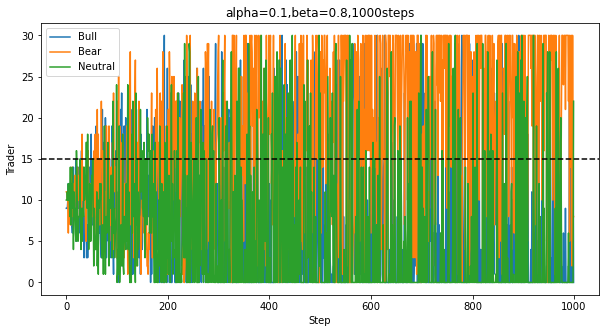

In [165]:
bull_array = np.array(bull_list)
bear_array = np.array(bear_list)
neutral_array = np.array(neutral_list)
price_array = np.array(price_list)

plt.figure(figsize=(10,5))
plt.plot(bull_array, label = 'Bull')
plt.plot(bear_array, label = 'Bear')
plt.plot(neutral_array, label = 'Neutral')
plt.xlabel("Step")
plt.ylabel("Trader")
plt.title('alpha=0.1,beta=0.8,1000steps')
plt.axhline(y=float(15), color='k', linestyle='--')
plt.legend()
plt.show()

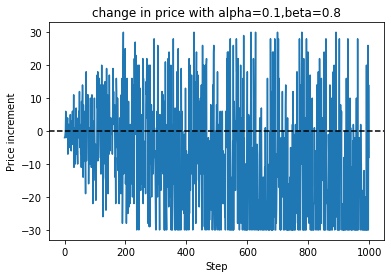

In [171]:
plt.plot(price_array)
plt.xlabel("Step")
plt.ylabel("Price increment")
plt.title('change in price with alpha=0.1,beta=0.8')
plt.axhline(y=float(0), color='k', linestyle='--')
plt.show()

## Two traders: Bear and Bull

In [41]:
def Modified_urn(length,q,N,alpha,beta):
    left_ball_path = []
    right_ball_path = []
    price_change = []
    
    left_ball = q*N
    right_ball = (1-q)*N
    
    left_ball_path.append(left_ball)
    right_ball_path.append(right_ball)
    
    for i in range(length):
        pick = np.random.choice([0,1],p=[left_ball/N,right_ball/N])
        if pick == 0:
            left_ball -= 1
            replace = np.random.choice([1,0],p=[(beta+right_ball)/(alpha+beta+N-1),(alpha+left_ball)/(alpha+beta+N-1)])
            if replace == 0:
                left_ball+=1
            elif replace == 1:
                right_ball+=1
        elif pick == 1:
            right_ball -=1
            replace = np.random.choice([1,0],p=[(beta+right_ball)/(alpha+beta+N-1),(alpha+left_ball)/(alpha+beta+N-1)])
            if replace == 0:
                left_ball+=1
            elif replace == 1:
                right_ball+=1
                                
        left_ball_path.append(left_ball)
        right_ball_path.append(right_ball)
        price_change.append(left_ball-right_ball)
    return left_ball_path,right_ball_path,price_change

## Case1: alpha = beta = 0.01

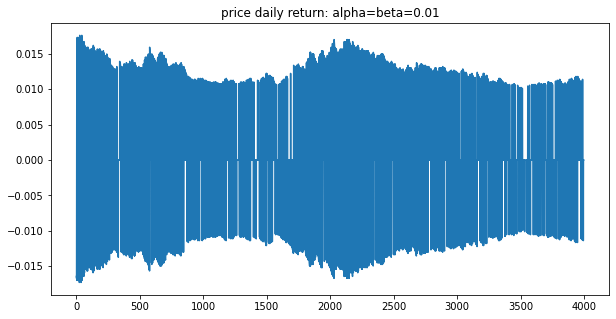

In [42]:
bull_urn, bear_urn, price_change = Modified_urn(4000, 0.5, 100, 0.01, 0.01)
#print(price_change)
S0 = 121.71 #1981-11-20
urn_return = [0]*4000
St = [0]*4000
St[0]=121.71
index_return_1 = []

for i in range (3999):
    St[i+1] = S0+price_change[i]
    value = (St[i+1]-St[i])/St[i]
    index_return_1.append(value)
#index_return
plt.figure(figsize=(10,5))
plt.title('price daily return: alpha=beta=0.01')
plt.plot(index_return_1)
#plt.show()

## Case 2: alpha = beta = 100

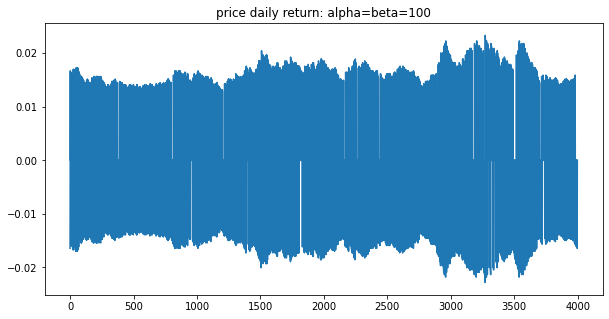

In [43]:
bull_urn, bear_urn, price_change = Modified_urn(4000, 0.5, 100, 100, 100)
#print(price_change)
S0 = 121.71 #1981-11-20
urn_return = [0]*4000
St = [0]*4000
St[0]=121.71
index_return_2 = []*4000
for i in range (3999):
    St[i+1] = S0+price_change[i]
    value = (St[i+1]-St[i])/St[i]
    index_return_2.append(value)
#index_return
plt.figure(figsize=(10,5))
plt.title('price daily return: alpha=beta=100')
plt.plot(index_return_2)
#plt.show()

## Case 3: alpha = beta = -100

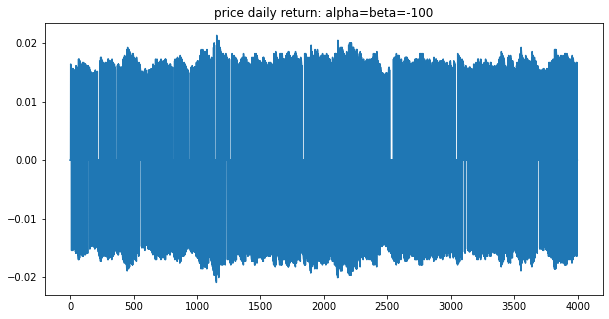

In [44]:
bull_urn, bear_urn, price_change = Modified_urn(4000, 0.5, 100, -100, -100)
#print(price_change)
S0 = 121.71 #1981-11-20
urn_return = [0]*4000
St = [0]*4000
St[0]=121.71
index_return_3 = []
for i in range (3999):
    St[i+1] = S0+price_change[i]
    value = (St[i+1]-St[i])/St[i]
    index_return_3.append(value)
#index_return
plt.figure(figsize=(10,5))
plt.title('price daily return: alpha=beta=-100')
plt.plot(index_return_3)
#plt.show()

In [45]:
import pandas as pd
df = pd.read_csv('sp500.csv')
#print(df)

In [46]:
realistic_return=[]
for i in range(4000):
    realistic_return.append(df['SP500'][14584+i])
#sp500_index 
#plt.title("Realistic Price Index return")
#plt.plot(realistic_return)
#plt.show()

Text(0.5, 1.0, 'Comparison with KDE,alpha = beta = 0.01')

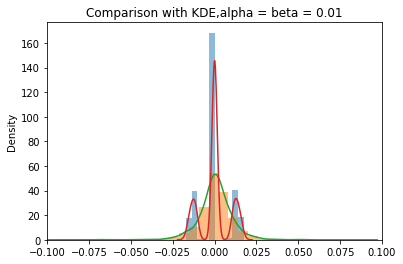

In [47]:
import seaborn as sns

plt.hist(index_return_1, alpha=0.5,density=True)    #blue
plt.hist(realistic_return, alpha=0.5,bins=50,density=True)   #orange
plt.xlim(xmin=-0.10, xmax = 0.10)
sns.kdeplot(data=realistic_return)
sns.kdeplot(data=index_return_1)
plt.title("Comparison with KDE,alpha = beta = 0.01")

Text(0.5, 1.0, 'Comparison with KDE,alpha = beta = -100')

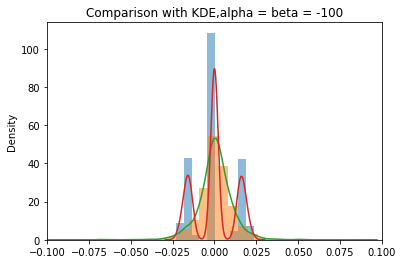

In [48]:
plt.hist(index_return_2, alpha=0.5,density=True)    #blue
plt.hist(realistic_return, alpha=0.5,bins=50,density=True)   #orange
plt.xlim(xmin=-0.10, xmax = 0.10)
sns.kdeplot(data=realistic_return)
sns.kdeplot(data=index_return_2)
plt.title("Comparison with KDE,alpha = beta = -100")

Text(0.5, 1.0, 'Comparison with KDE,alpha = beta = 100')

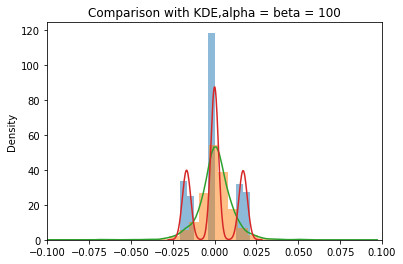

In [49]:
plt.hist(index_return_3, alpha=0.5,density=True)    #blue
plt.hist(realistic_return, alpha=0.5,bins=50,density=True)   #orange
plt.xlim(xmin=-0.10, xmax = 0.10)
sns.kdeplot(data=realistic_return)
sns.kdeplot(data=index_return_3)
plt.title("Comparison with KDE,alpha = beta = 100")

Text(0.5, 1.0, 'Comparison of three cases alpha & beta')

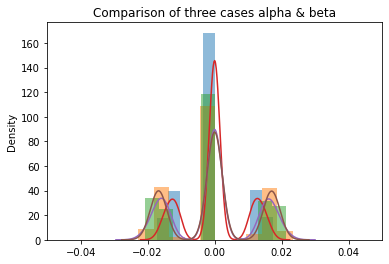

In [50]:
plt.hist(index_return_1, alpha=0.5,density=True)    #blue
plt.hist(index_return_2, alpha=0.5,density=True)   #orange
plt.hist(index_return_3, alpha=0.5,density=True)  
plt.xlim(xmin=-0.05, xmax = 0.05)
sns.kdeplot(data=index_return_1)
sns.kdeplot(data=index_return_2)
sns.kdeplot(data=index_return_3)
plt.title("Comparison of three cases alpha & beta")

## Make the price increment to normally distributed 

In [51]:
def Modified_urn_normal(length,q,N,alpha,beta):
    bear_ball_path = []
    bull_ball_path = []
    price_increment = []
    
    bear_ball = q*N
    bull_ball = (1-q)*N
    
    bear_ball_path.append(bear_ball)
    bull_ball_path.append(bull_ball)
    
    for i in range(length):
        pick = np.random.choice([0,1],p=[bear_ball/N,bull_ball/N])
        if pick == 0:
            bear_ball -= 1
            replace = np.random.choice([1,0],p=[(beta+bull_ball)/(alpha+beta+N-1),(alpha+bear_ball)/(alpha+beta+N-1)])
            if replace == 0:
                bear_ball+=1
                price_change = -abs(np.random.normal(1,0.16))
            elif replace == 1:
                bull_ball+=1
                price_change = abs(np.random.normal(1,0.16))
        elif pick == 1:
            bull_ball -=1
            replace = np.random.choice([1,0],p=[(beta+bull_ball)/(alpha+beta+N-1),(alpha+bear_ball)/(alpha+beta+N-1)])
            if replace == 0:
                bear_ball+=1
                price_change = -abs(np.random.normal(1,0.16))
            elif replace == 1:
                bull_ball+=1
                price_change = abs(np.random.normal(1,0.16))
                                
        bear_ball_path.append(bear_ball)
        bull_ball_path.append(bull_ball)
        price_increment.append(price_change)
    return bear_ball_path,bull_ball_path,price_increment

## case 1 in normal case

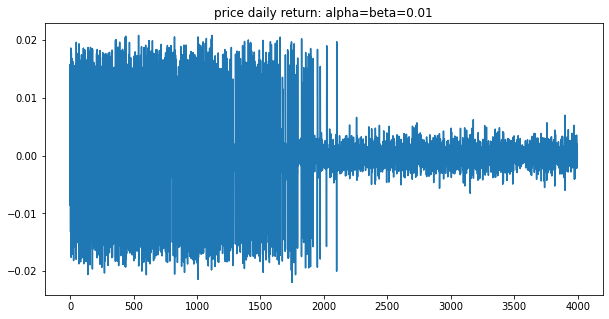

In [52]:
bull_urn, bear_urn, price_change = Modified_urn_normal(4000, 0.5, 100, 0.01, 0.01)
#print(price_change)
S0 = 121.71 #1981-11-20
urn_return = [0]*4000
St = [0]*4000
St[0]=121.71
index_return_normal_1 = []

for i in range (3999):
    St[i+1] = S0+price_change[i]
    value = (St[i+1]-St[i])/St[i]
    index_return_normal_1.append(value)
#index_return
plt.figure(figsize=(10,5))
plt.title('price daily return: alpha=beta=0.01')
plt.plot(index_return_normal_1)
#plt.show()

Text(0.5, 1.0, 'Comparison with KDE,alpha = beta = 0.01')

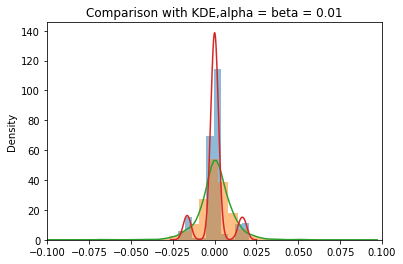

In [53]:
import seaborn as sns

plt.hist(index_return_normal_1, alpha=0.5,density=True)    #blue
plt.hist(realistic_return, alpha=0.5,bins=50,density=True)   #orange
plt.xlim(xmin=-0.10, xmax = 0.10)
sns.kdeplot(data=realistic_return)
sns.kdeplot(data=index_return_normal_1)
plt.title("Comparison with KDE,alpha = beta = 0.01")

## case 2

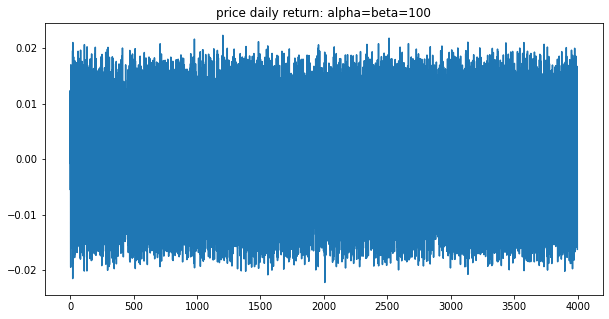

In [57]:
bull_urn, bear_urn, price_change = Modified_urn_normal(4000, 0.5, 100, 100, 100)
#print(price_change)
S0 = 121.71 #1981-11-20
urn_return = [0]*4000
St = [0]*4000
St[0]=121.71
index_return_normal_2 = []*4000
for i in range (3999):
    St[i+1] = S0+price_change[i]
    value = (St[i+1]-St[i])/St[i]
    index_return_normal_2.append(value)
#index_return
plt.figure(figsize=(10,5))
plt.title('price daily return: alpha=beta=100')
plt.plot(index_return_normal_2)
#plt.show()

Text(0.5, 1.0, 'Comparison with KDE,alpha = beta = 100')

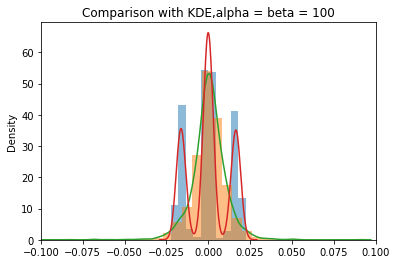

In [59]:
plt.hist(index_return_normal_2, alpha=0.5,density=True)    #blue
plt.hist(realistic_return, alpha=0.5,bins=50,density=True)   #orange
plt.xlim(xmin=-0.10, xmax = 0.10)
sns.kdeplot(data=realistic_return)
sns.kdeplot(data=index_return_normal_2)
plt.title("Comparison with KDE,alpha = beta = 100")

## case 3

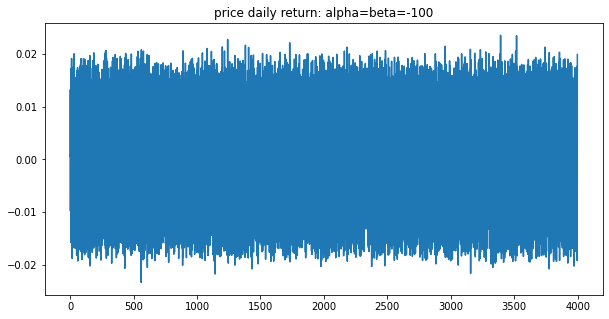

In [58]:
bull_urn, bear_urn, price_change = Modified_urn_normal(4000, 0.5, 100, -100, -100)
#print(price_change)
S0 = 121.71 #1981-11-20
urn_return = [0]*4000
St = [0]*4000
St[0]=121.71
index_return_normal_3 = []
for i in range (3999):
    St[i+1] = S0+price_change[i]
    value = (St[i+1]-St[i])/St[i]
    index_return_normal_3.append(value)
#index_return
plt.figure(figsize=(10,5))
plt.title('price daily return: alpha=beta=-100')
plt.plot(index_return_normal_3)
#plt.show()

Text(0.5, 1.0, 'Comparison with KDE,alpha = beta = -100')

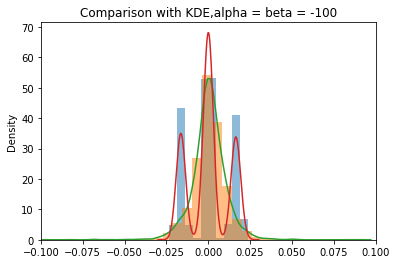

In [60]:
plt.hist(index_return_normal_3, alpha=0.5,density=True)    #blue
plt.hist(realistic_return, alpha=0.5,bins=50,density=True)   #orange
plt.xlim(xmin=-0.10, xmax = 0.10)
sns.kdeplot(data=realistic_return)
sns.kdeplot(data=index_return_normal_3)
plt.title("Comparison with KDE,alpha = beta = -100")